In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

In [69]:
audio_sensors = [
    '../audio_data/audio_files/audio_sensor_1.wav',
    '../audio_data/audio_files/audio_sensor_2.wav',
    '../audio_data/audio_files/audio_sensor_3.wav',
    '../audio_data/audio_files/audio_sensor_4.wav'
]

simple_audio_files = [
    librosa.load(audio_path, sr=22050, offset=80, duration=30)
    for audio_path in audio_sensorsmuch
]

In [41]:
simple_audio_files

[(array([ 0.01095283,  0.01198757,  0.01399088, ..., -0.00601661,
         -0.00890172, -0.00720131], dtype=float32),
  22050),
 (array([0.01850438, 0.01814759, 0.01832032, ..., 0.01055288, 0.01044011,
         0.01035178], dtype=float32),
  22050),
 (array([0.00907409, 0.01066661, 0.01191032, ..., 0.00863659, 0.00856829,
         0.00781512], dtype=float32),
  22050),
 (array([0.00674641, 0.00908005, 0.01020634, ..., 0.02512884, 0.0195812 ,
         0.01611423], dtype=float32),
  22050)]

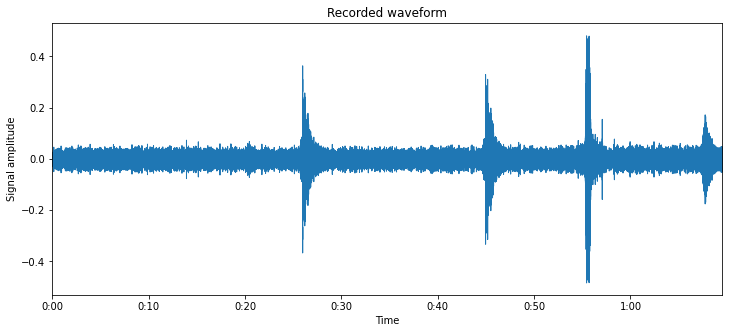

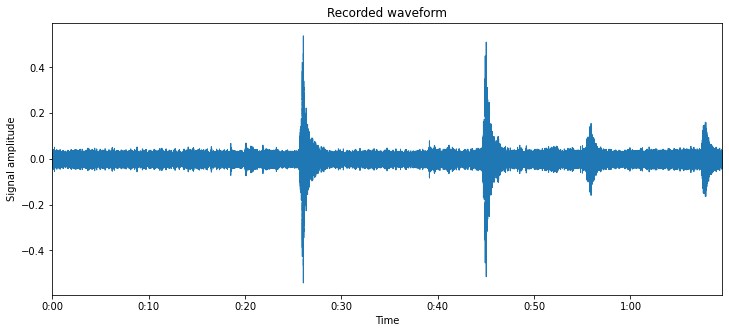

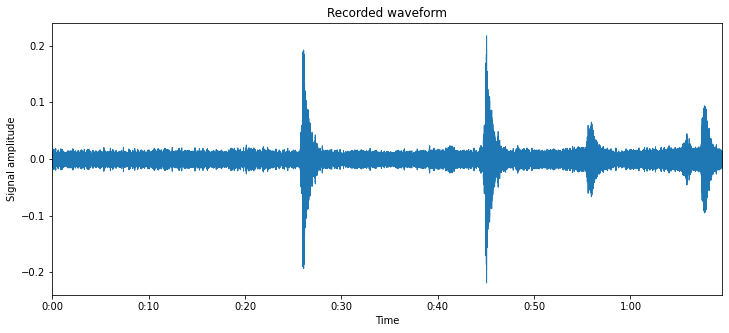

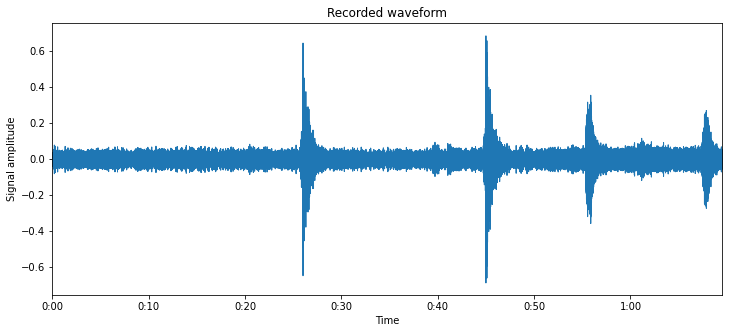

In [18]:
# %% Plot signal waves 
for aud, sr in simple_audio_files:
    plt.figure(figsize=(12,5))
    librosa.display.waveplot(aud, sr=sr)
    plt.ylabel("Signal amplitude")
    plt.title("Recorded waveform")

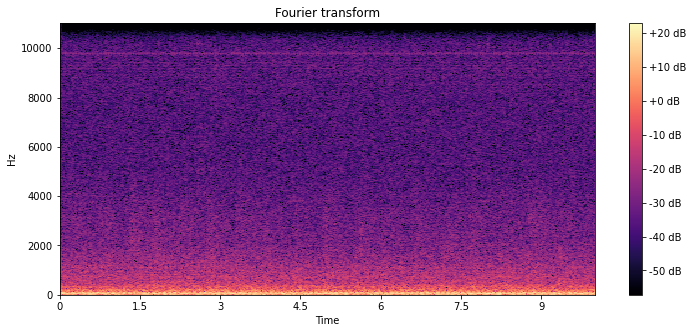

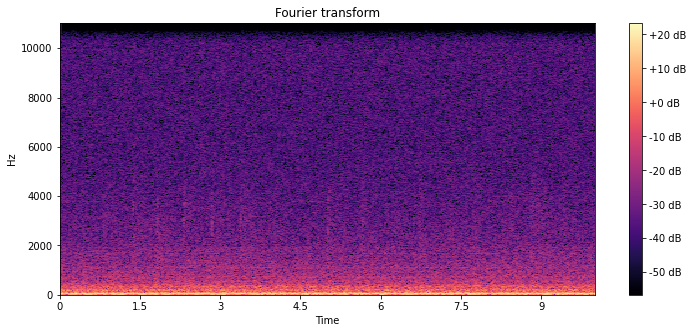

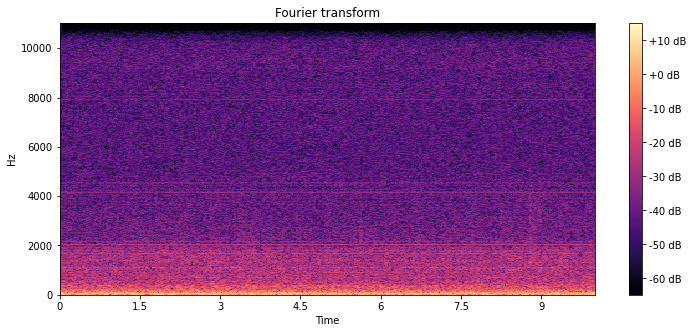

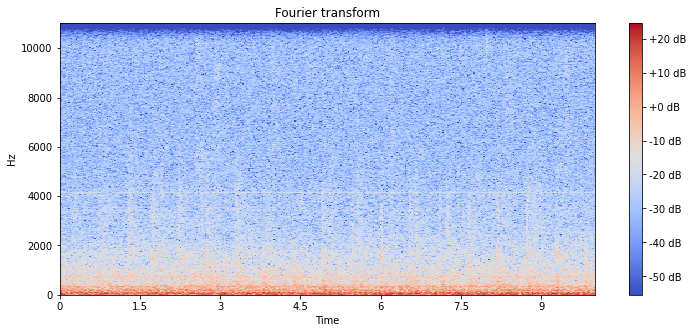

In [49]:
# STFT short time fourier transform
for aud, sr in simple_audio_files:
    X = librosa.stft(aud[:len(aud)//3])
    X_db = librosa.amplitude_to_db(np.abs(X))


    fig, ax = plt.subplots(figsize = (12, 5))
    img = librosa.display.specshow(X_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title='Fourier transform')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

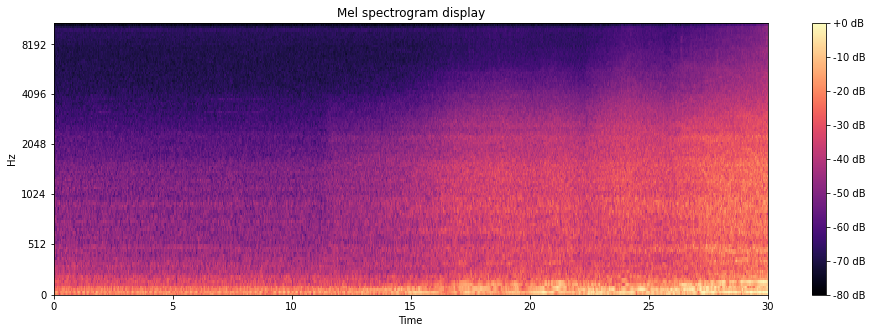

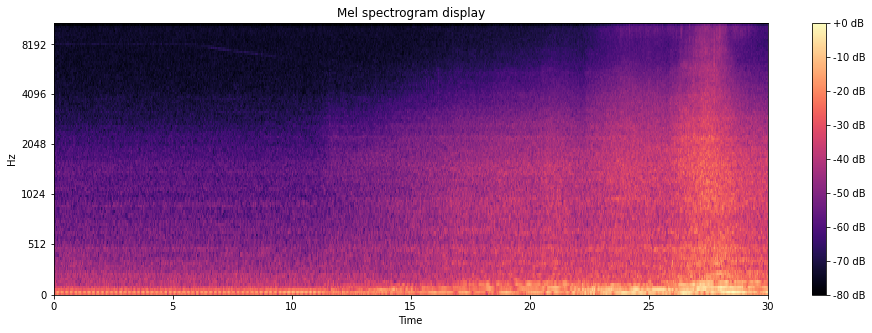

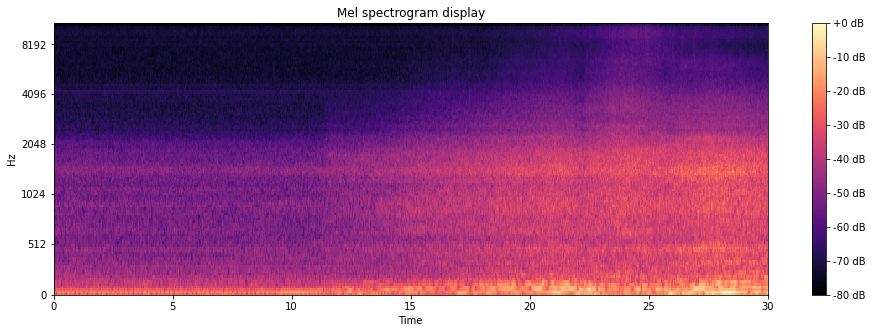

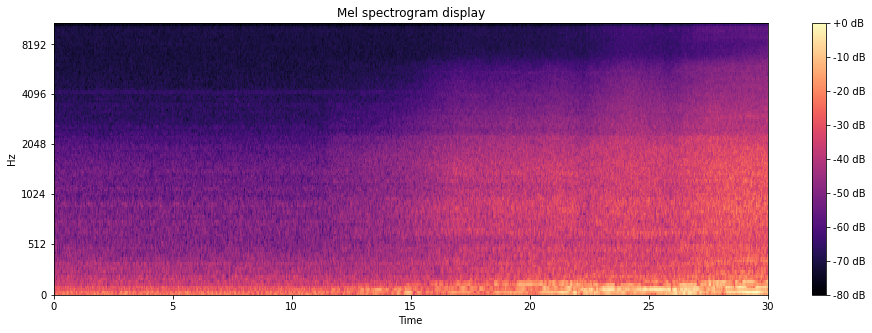

In [67]:
# Mel spectogram
for aud, sr in simple_audio_files:
    fig, ax = plt.subplots(figsize = (16, 5))
    M = librosa.feature.melspectrogram(y=aud, sr=sr)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel spectrogram display')
    fig.colorbar(img, ax=ax, format="%+2.f dB")


In [13]:
import IPython.display as ipd

In [70]:
ipd.Audio(simple_audio_files[1][0], rate=22050)